In [1]:
# day11_2.ipynb

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.1.0'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

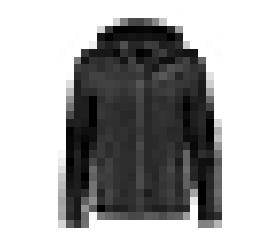

In [15]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]  # [4]

'Coat'

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

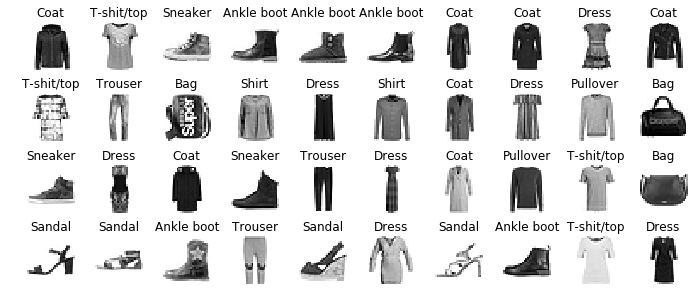

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  # ==> 784
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
keras.backend.clear_session()

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model.layers

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
# ! conda install graphviz -y
# ! conda install pydot -y
# ! conda install python-graphviz -y

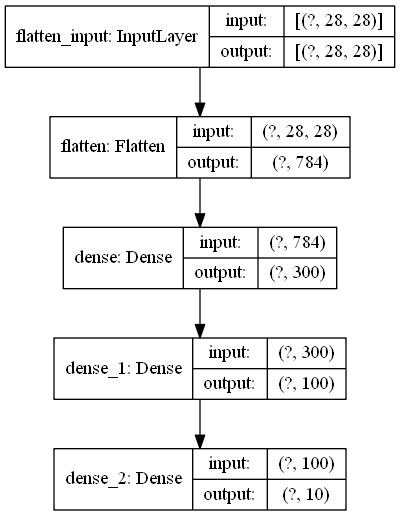

In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)